<a href="https://colab.research.google.com/github/namangup/pclub-secy-recruit/blob/master/Machine%20Learning/lassoreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [2]:
diab = datasets.load_diabetes()
x = diab.data
y = diab.target.reshape(-1,1)

# normalization using norm which effectively sets zj = 1
x = x / np.linalg.norm(x,axis=0)
print(x.shape,y.shape)

(442, 10) (442, 1)


In [0]:
def soft_threshold(rho, k):
  if rho < -k:
    return (rho + k)
  elif rho > k:
    return (rho - k)
  else: return 0

In [0]:
def coord_descent(w,x,y,k,iters):
  m,n = x.shape
  for i in range(iters):
    for j in range(n):
      
      xj = x[:,j].reshape(-1,1) # making column vector
      y_pred = x.dot(w)
      rho = xj.T@(y-y_pred+w[j]*xj)

      w[j] = soft_threshold(rho,k)

  return w.flatten()

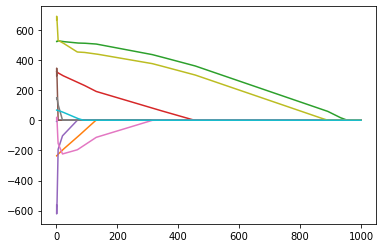

In [5]:
m,n = x.shape
w0 = np.ones((n,1))
iters = 100
wlist = list()

k = np.logspace(0,3,300)
for i in k:
  w = coord_descent(w0,x,y,i,iters)
  wlist.append(w)

w_lasso = np.stack(wlist).T
n1 = w_lasso.shape[0]

for i in range(n1):
  plt.plot(k,w_lasso[i])

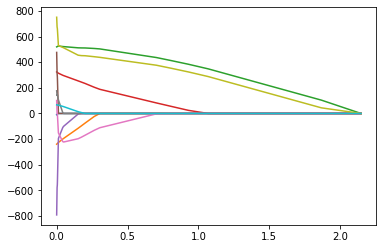

In [6]:
epsilon = 1e-6
k1,w1,_ = linear_model.lasso_path(x,y,epsilon,fit_intercept = False)
for i in range(x.shape[1]):
  plt.plot(k1,w1[0][i])

Sources :
https://en.wikipedia.org/wiki/Coordinate_descent

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://www.coursera.org/learn/ml-regression/home/week/5